In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

data_path = r'E:\Projects\Chess\Lichess_data\stockfish\\'
all_features_path = data_path+'all_features\\top_all_features.pickle'

In [2]:
# Считываем вычисленные характеристики
X = pd.read_pickle(all_features_path)
X

,0,1,2,3,4,5,6,7,8,9,...,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202
0,7.0,0.0,0.0,14.0,36.0,1.0,1.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,0.0,0.0,20.0,30.0,0.0,1.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0.0,0.0,18.0,0.0,0.0,1.0,0.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,0.0,0.0,18.0,58.0,0.0,1.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,0.0,0.0,12.0,19.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21537,14.0,0.0,0.0,13.0,0.0,2.0,1.0,2.0,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0
21538,6.0,0.0,0.0,14.0,0.0,1.0,1.0,1.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,0
21539,9.0,0.0,0.0,12.0,0.0,1.0,1.0,2.0,8.0,1.0,...,0,0,0,0,0,0,0,0,0,0
21540,13.0,0.0,0.0,19.0,0.0,1.0,1.0,0.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
with open(data_path+'top_data.pickle', 'rb') as f:
    data = pd.read_pickle(f)
data

,ELO_white,ELO_black,Result,ECO,Opening,UTCDate,TimeControl,Termination
0,2479.0,2481.0,1.0,B06,Modern Defense: Two Knights Variation,2014-01-15,bullet,Normal
1,2508.0,2454.0,1.0,B08,Pirc Defense: Classical Variation,2014-01-15,bullet,Normal
2,2442.0,2520.0,0.0,C11,French Defense: Steinitz Variation,2014-01-15,bullet,Time forfeit
3,2531.0,2431.0,1.0,B07,Pirc Defense #4,2014-01-15,bullet,Normal
4,2422.0,2542.0,1.0,E20,Nimzo-Indian Defense,2014-01-15,bullet,Normal
...,...,...,...,...,...,...,...,...
21537,2662.0,2762.0,0.5,C26,Vienna Game: Mieses Variation,2016-06-29,blitz,Normal
21538,2679.0,2744.0,1.0,C42,Russian Game: Three Knights Game,2016-06-29,blitz,Normal
21539,2436.0,2433.0,0.0,A15,"English Opening: Anglo-Indian Defense, King's ...",2016-06-29,blitz,Normal
21540,2454.0,2524.0,0.0,C42,Russian Game: Three Knights Game,2016-06-29,blitz,Normal


In [4]:
mean_elos = (data.ELO_white + data.ELO_black) / 2
elo_difference = data.ELO_white - data.ELO_black

In [5]:
X_train_mean, X_test_mean, Y_train_mean, Y_test_mean = train_test_split(X, mean_elos, test_size=0.2)
X_train_diff, X_test_diff, Y_train_diff, Y_test_diff = train_test_split(X, elo_difference, test_size=0.2)

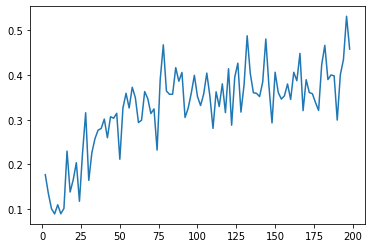

In [6]:
if os.path.exists(r'E:\Projects\Chess\lichess\models\nn_epochs_mean.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\nn_epochs_mean.pickle','rb') as f:
        nn_epochs_mean = pickle.load(f)
else:
    nn_epochs_mean = {}
    for e in range(2,200,2):
        mean_model = keras.Sequential()
        mean_model.add(keras.layers.Dense(507, input_shape=(X_train_mean.shape[1],), activation=tf.nn.relu))
        mean_model.add(keras.layers.Dropout(0.5))
        mean_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
        mean_model.add(keras.layers.Dropout(0.25))
        mean_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
        mean_model.add(keras.layers.Dense(1, activation='linear'))
        mean_model.compile(optimizer=tf.keras.optimizers.Adam(), 
                    loss="mean_absolute_percentage_error")
        mean_model.fit(X_train_mean, Y_train_mean, batch_size = 250, validation_split=0.2, epochs=e)

        elo_mean_pred = np.array(mean_model.predict(X_test_mean))
        nn_epochs_mean[e] = mean_absolute_percentage_error(elo_mean_pred, Y_test_mean)
    with open(r'E:\Projects\Chess\lichess\models\nn_epochs_mean.pickle','wb') as f:
        pickle.dump(nn_epochs_mean, f)
plt.plot(nn_epochs_mean.keys(),nn_epochs_mean.values())

In [10]:
val = list(nn_epochs_mean.values())
val.sort()
minimals = val[:5]
minimals

[0.08933963824637293,
 0.08974487019245658,
 0.1008864351961835,
 0.10162154882451148,
 0.10978862788372644]

In [11]:
minimal_indexes = []
for m in minimals:
    minimal_indexes.append(list(nn_epochs_mean.keys())[list(nn_epochs_mean.values()).index(m)])
minimal_indexes

[8, 12, 6, 14, 10]

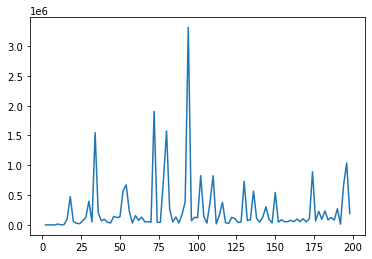

In [7]:
if os.path.exists(r'E:\Projects\Chess\lichess\models\nn_epochs_diff.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\nn_epochs_diff.pickle','rb') as f:
        nn_epochs_diff = pickle.load(f)
else:
    nn_epochs_diff = {}
    for e in range(2,200,2):
        diff_model = keras.Sequential()
        diff_model.add(keras.layers.Dense(507, input_shape=(X_train_diff.shape[1],), activation=tf.nn.relu))
        diff_model.add(keras.layers.Dropout(0.5))
        diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
        diff_model.add(keras.layers.Dropout(0.25))
        diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
        diff_model.add(keras.layers.Dense(1, activation='linear'))
        diff_model.compile(optimizer=tf.keras.optimizers.Adam(), 
                    loss="mean_absolute_percentage_error")
        diff_model.fit(X_train_diff, Y_train_diff, batch_size = 250, validation_split=0.2, epochs=e)
        
        elo_diff_pred = np.array(diff_model.predict(X_test_diff))
        nn_epochs_diff[e] = mean_absolute_percentage_error(elo_diff_pred, Y_test_diff)
    with open(r'E:\Projects\Chess\lichess\models\nn_epochs_diff.pickle','wb') as f:
        pickle.dump(nn_epochs_diff, f)
plt.plot(nn_epochs_diff.keys(),nn_epochs_diff.values())

In [14]:
val = list(nn_epochs_diff.values())
val.sort()
minimals = val[:5]
minimals

[6.357436010633207,
 30.060556555692955,
 47.05100088667592,
 558.838478035093,
 1081.6290135545921]

In [15]:
minimal_indexes = []
for m in minimals:
    minimal_indexes.append(list(nn_epochs_diff.keys())[list(nn_epochs_diff.values()).index(m)])
minimal_indexes

[2, 8, 4, 6, 12]

In [18]:
'''mean_model = keras.Sequential()
#mean_model.add(keras.layers.Dense(512, input_shape=(X_train_mean.shape[1],), activation=tf.nn.relu))
#mean_model.add(keras.layers.Dropout(0.5))
#mean_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
#mean_model.add(keras.layers.Dropout(0.2))
#mean_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
#mean_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
mean_model.add(keras.layers.Dense(1024, activation=tf.nn.relu))
mean_model.add(keras.layers.Dense(32, activation=tf.nn.relu))
mean_model.add(keras.layers.Dense(8, activation=tf.nn.relu))
mean_model.add(keras.layers.Dense(1, activation='linear'))
mean_model.compile(optimizer=tf.keras.optimizers.Adam(), 
            loss="mean_absolute_percentage_error")
mean_model.fit(X_train_mean, Y_train_mean, batch_size = 250, validation_split=0.2, epochs=140)

#elo_mean_pred = np.array(mean_model.predict(X_test_mean))
#nn_epochs_mean[e] = mean_absolute_percentage_error(elo_mean_pred, Y_test_mean)'''

'mean_model = keras.Sequential()\n#mean_model.add(keras.layers.Dense(512, input_shape=(X_train_mean.shape[1],), activation=tf.nn.relu))\n#mean_model.add(keras.layers.Dropout(0.5))\n#mean_model.add(keras.layers.Dense(85, activation=tf.nn.relu))\n#mean_model.add(keras.layers.Dropout(0.2))\n#mean_model.add(keras.layers.Dense(85, activation=tf.nn.relu))\n#mean_model.add(keras.layers.Dense(85, activation=tf.nn.relu))\nmean_model.add(keras.layers.Dense(1024, activation=tf.nn.relu))\nmean_model.add(keras.layers.Dense(32, activation=tf.nn.relu))\nmean_model.add(keras.layers.Dense(8, activation=tf.nn.relu))\nmean_model.add(keras.layers.Dense(1, activation=\'linear\'))\nmean_model.compile(optimizer=tf.keras.optimizers.Adam(), \n            loss="mean_absolute_percentage_error")\nmean_model.fit(X_train_mean, Y_train_mean, batch_size = 250, validation_split=0.2, epochs=140)\n\n#elo_mean_pred = np.array(mean_model.predict(X_test_mean))\n#nn_epochs_mean[e] = mean_absolute_percentage_error(elo_mean_p

In [12]:
'''diff_model = keras.Sequential()
#diff_model.add(keras.layers.Dense(512, input_shape=(X_train_diff.shape[1],), activation=tf.nn.relu))
#diff_model.add(keras.layers.Dropout(0.5))
#diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
#diff_model.add(keras.layers.Dropout(0.4))
#diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
#diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
#diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
mean_model.add(keras.layers.Dense(1024, activation=tf.nn.relu))
mean_model.add(keras.layers.Dense(32, activation=tf.nn.relu))
mean_model.add(keras.layers.Dense(8, activation=tf.nn.relu))
diff_model.add(keras.layers.Dense(1, activation='linear'))
diff_model.compile(optimizer=tf.keras.optimizers.Adam(), 
        loss="mean_absolute_percentage_error")
diff_model.fit(X_train_diff, Y_train_diff, batch_size = 250, validation_split=0.2, epochs=140)'''

'diff_model = keras.Sequential()\n#diff_model.add(keras.layers.Dense(512, input_shape=(X_train_diff.shape[1],), activation=tf.nn.relu))\n#diff_model.add(keras.layers.Dropout(0.5))\n#diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))\n#diff_model.add(keras.layers.Dropout(0.4))\n#diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))\n#diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))\n#diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))\nmean_model.add(keras.layers.Dense(1024, activation=tf.nn.relu))\nmean_model.add(keras.layers.Dense(32, activation=tf.nn.relu))\nmean_model.add(keras.layers.Dense(8, activation=tf.nn.relu))\ndiff_model.add(keras.layers.Dense(1, activation=\'linear\'))\ndiff_model.compile(optimizer=tf.keras.optimizers.Adam(), \n        loss="mean_absolute_percentage_error")\ndiff_model.fit(X_train_diff, Y_train_diff, batch_size = 250, validation_split=0.2, epochs=140)'

In [13]:
mean_model = keras.Sequential()
mean_model.add(keras.layers.Dense(507, input_shape=(X_train_mean.shape[1],), activation=tf.nn.relu))
mean_model.add(keras.layers.Dropout(0.5))
mean_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
mean_model.add(keras.layers.Dropout(0.25))
mean_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
mean_model.add(keras.layers.Dense(1, activation='linear'))
mean_model.compile(optimizer=tf.keras.optimizers.Adam(), 
            loss="mean_absolute_percentage_error")
mean_model.fit(X_train_mean, Y_train_mean, batch_size = 250, validation_split=0.2, epochs=8)

elo_mean_pred = np.array(mean_model.predict(X_test_mean))
mean_absolute_percentage_error(elo_mean_pred, Y_test_mean)

Epoch 1/8
56/56 [==============================] - 1s 9ms/step - loss: 51.6431 - val_loss: 30.1110
Epoch 2/8
56/56 [==============================] - 0s 7ms/step - loss: 21.6100 - val_loss: 13.3067
Epoch 3/8
56/56 [==============================] - 0s 7ms/step - loss: 15.5199 - val_loss: 11.6820
Epoch 4/8
56/56 [==============================] - 0s 7ms/step - loss: 14.2309 - val_loss: 12.3286
Epoch 5/8
56/56 [==============================] - 0s 7ms/step - loss: 13.6699 - val_loss: 10.3470
Epoch 6/8
56/56 [==============================] - 0s 7ms/step - loss: 12.6875 - val_loss: 9.4261
Epoch 7/8
56/56 [==============================] - 0s 7ms/step - loss: 12.3879 - val_loss: 11.6877
Epoch 8/8
56/56 [==============================] - 0s 7ms/step - loss: 11.9021 - val_loss: 9.9574


0.11648851627140132

In [16]:
diff_model = keras.Sequential()
diff_model.add(keras.layers.Dense(507, input_shape=(X_train_diff.shape[1],), activation=tf.nn.relu))
diff_model.add(keras.layers.Dropout(0.5))
diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
diff_model.add(keras.layers.Dropout(0.25))
diff_model.add(keras.layers.Dense(85, activation=tf.nn.relu))
diff_model.add(keras.layers.Dense(1, activation='linear'))
diff_model.compile(optimizer=tf.keras.optimizers.Adam(), 
            loss="mean_absolute_percentage_error")
diff_model.fit(X_train_diff, Y_train_diff, batch_size = 250, validation_split=0.2, epochs=2)

elo_diff_pred = np.array(diff_model.predict(X_test_diff))
mean_absolute_percentage_error(elo_diff_pred, Y_test_diff)

Epoch 1/2
56/56 [==============================] - 1s 9ms/step - loss: 38618976.0000 - val_loss: 84512216.0000
Epoch 2/2
56/56 [==============================] - 0s 7ms/step - loss: 38661248.0000 - val_loss: 79491664.0000


42.370060229558476

In [17]:
# Предсказание на тех же данных, на которых обучались
mean_pred_rf = np.array(mean_model.predict(X_test_mean))
elo_diff_pred = np.array(diff_model.predict(X_test_diff))
white_elos = mean_pred_rf + elo_diff_pred / 2
black_elos = mean_pred_rf - elo_diff_pred / 2
print(mean_pred_rf.shape, Y_test_mean.to_numpy().shape)
wdiffs = mean_absolute_percentage_error(mean_pred_rf[:,0], Y_test_mean)
bdiffs = mean_absolute_percentage_error(elo_diff_pred, Y_test_diff)
print('MAPE for mean error: ', wdiffs)
print('MAPE for diff error: ', bdiffs)

(4309, 1) (4309,)
MAPE for mean error:  0.11648851627140132
MAPE for diff error:  42.370060229558476
